<a href="https://colab.research.google.com/github/GabrielMacedoFrota/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_(Sydney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Em 14 anos de existência, a Startup fundada em 2008, já **hospedou mais de 1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Sydney/Austrália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Os dados resumidos de hospedagens da cidade de Sydney/Austrália foram extraídos através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), em formato csv. Existem outras bases de dados mais detalhadas sobre a cidade, porém aqui vamos analisar uma base resumida.

Para conseguir ler, manipular e extrair informações relevantes da base de dados, primeiro importaremos as principais bibliotecas do python para esse fim: 

* **pandas**: manipulação e análise de dados
* **matplotlib**: Plotar gráficos estilizados
* **seaborn**: baseado no matplotlib, produz gráficos de alto nível e visualmente atrativos
* **numpy**: álgebra linear e matrizes

Em seguida, iremos definir nosso *dataframe* utilizando o pandas para ler a base de dados importada em csv.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/australia/nsw/sydney/2022-06-06/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número identificador do imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número identificador do host
* `host_name` - Nome do anfitrião da propriedade
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - Coordenada geográfica de Latitude da propriedade
* `longitude` -  Coordenada geográfica de Longitude da propriedade
* `room_type` - Tipo de quarto oferecido
* `price` - Preço do pernoite
* `minimum_nights` - número de pernoites mínimas a reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_mounth` - número reviews que a residência tem por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - quantidade de dias que o imóvel está disponível por ano


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,90,195,2020-03-13,1.28,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,2,3,2021-06-01,0.04,2,66,0,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,79,2,414,2022-06-02,3.31,1,258,40,PID-STRA-24061-7
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,90,76,2020-01-03,0.54,1,0,0,NaN
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81748,151.23484,Entire home/apt,150,2,331,2022-06-01,2.38,1,204,44,PID-STRA-2810


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aplicando o método `shape` podemos identificar as dimensões da base de dados: são 18 variáveis (colunas) e 20632 entradas (linhas).

Para verificar os tipos de variáveis dos dados inseridos em cada coluna utilizamos o método `dtypes`. Para essa base de dados não foi identificado nenhum tipo de variável que possa causar distorção ou problema nas análises como, por exemplo, uma coluna de data estar em formato de texto.


In [4]:
# identificar o volume de dados do DataFrame
print('Variáveis:\t {}'.format(df.shape[1]))
print('Entradas:\t {}'.format(df.shape[0]))

# verificar os tipos de variáveis do dataset
df.dtypes

Variáveis:	 18
Entradas:	 20632


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Podemos notar através do método `isnull` que a coluna 'neighbourhood_group' não possui nenhum dado para esse dataset (100% nulo), indicando ser uma variável que possivelmente iremos excluir do *dataframe*. Além dessa, a coluna `license` parece ser um código de licença ou algo do tipo e está classificada como *object*, ou seja, texto. e tem 59% de entradas vazias.
E reviews_per_month e last_reviews possuem ambas 25,8% de dados nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.591363
reviews_per_month                 0.258530
last_review                       0.258530
name                              0.000339
host_name                         0.000097
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Quando se quer entender melhor os dados e extrair insights, uma maneira interessante de se abordar a questão é visualisando a distribuição das variáveis através de histogramas. Aqui vou plotar os histogramas de todas elas - apesar de em algumas variáveis esse gráfico não fazer sentido, como é o caso de `id`, por exemplo.

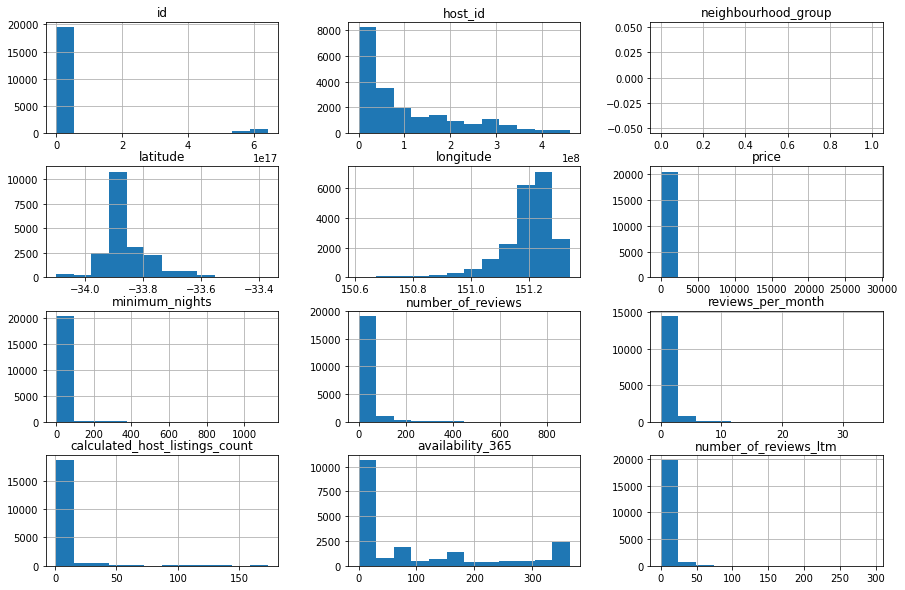

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=12, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel? Será que temos outliers?**

Conforme calculado abaixo a média de preços do pernoite na cidade de Sydney é de $255.21.  

In [7]:
# ver a média da coluna `price``
df.price.mean()

255.21893175649475

Entretanto, vamos avaliar se existem _outliers_ que estejam distorcendo esse resultado aplicando o método `describe` e produzindo um gráfico de boxblot

In [8]:
# aplicando o método describe para Price

df.price.describe()

count    20632.000000
mean       255.218932
std        524.454170
min         13.000000
25%         82.000000
50%        149.000000
75%        252.000000
max      28613.000000
Name: price, dtype: float64


price: valores acima de 700
1244 entradas
6.0295%


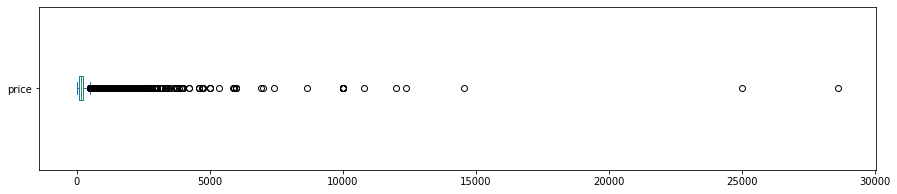

In [9]:
# plotando um boxplot para price

df.price.plot(kind='box', vert=False, figsize=(15, 3));

# ver a quantidade de valores acima de 700

print('\nprice: valores acima de 700')
print("{} entradas".format(len(df[df.price > 700])))
print('{:.4f}%'.format((len(df[df.price > 700]) / df.shape[0])*100))

Observando as estatísticas iniciais da coluna `price`, vemos que 75% dos valores se encontram abaixo de 252 e o valor máximo encontrado é 28613.

Para melhor trabalhar os dados, vamos limpar a base de dados com os valores de `price` acima de 700, valor a partir do qual existem 6% das entradas (linhas).


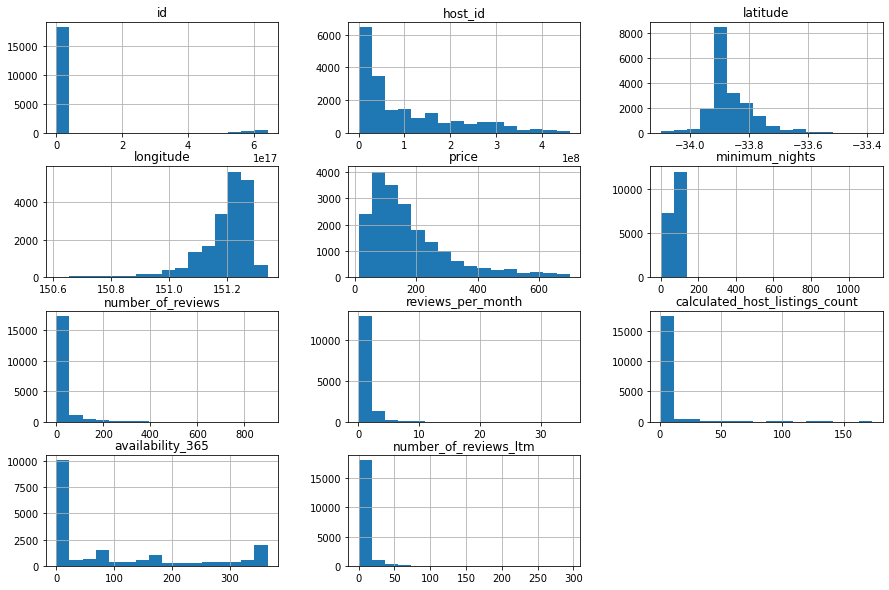

In [10]:
# criando uma base de dados nova com valores de price acima de 700

dfclean = df.copy()
dfclean.drop(dfclean[dfclean.price > 700].index, axis=0, inplace=True)

# excluindo a coluna neighbourhood_group pois está vazia

dfclean.drop('neighbourhood_group', axis=1, inplace=True)

#plotando novo histograma da base de dados

dfclean.hist(bins=16, figsize=(15, 10));

Nota-se agora que o histograma de `price` está menos distorcido, com a retirada de muitos outliers presentes. Vamos plotar um novo boxplot para essa coluna para visualisarmos melhor o novo corte dos dados.

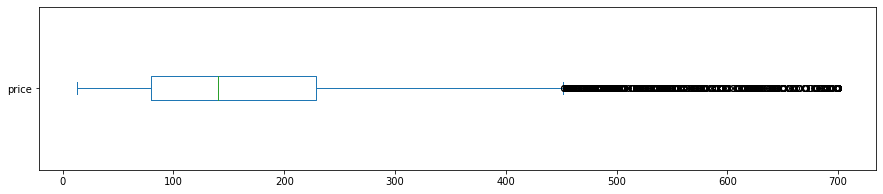

In [11]:
# plotando boxplot de price com os outliers excluídos

dfclean.price.plot(kind='box', vert=False, figsize=(15, 3));

### **Q5. Qual a correlação existente entre as variáveis**
Utilizando o método `corr` para se criar uma matriz de correlação e em seguida um heatmap, é possível perceber que a correlação entre as diferentes variáveis em sua maioria é muito fraca e, em alguns casos, até negativa. 

Cabe lembrar que a correlação pode ser positiva ou negativa, e não necessariamente ela mostra uma relação de causalidade, mas pode-se extrair algumas ideias a partir desse ponto.

In [12]:
# criar uma matriz de correlação
corr = dfclean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.215497,0.024632,0.084845,0.108312,0.128585
minimum_nights,-0.215497,1.000000,-0.276754,-0.423041,-0.195688,-0.246337
number_of_reviews,0.024632,-0.276754,1.000000,0.688123,-0.027311,0.153035
reviews_per_month,0.084845,-0.423041,0.688123,1.000000,0.046366,0.246919
calculated_host_listings_count,0.108312,-0.195688,-0.027311,0.046366,1.000000,0.190110
availability_365,0.128585,-0.246337,0.153035,0.246919,0.190110,1.000000


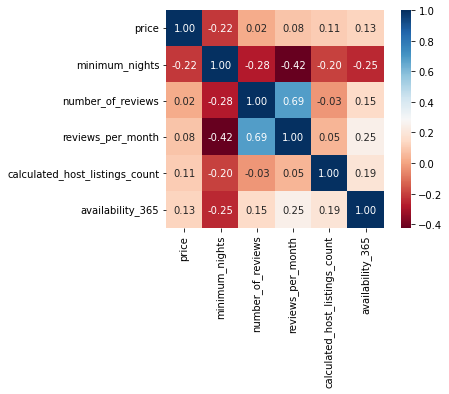

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True).figsize=(30, 30)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
Saber o tipo de imóvel mais alugado é interessante para identificar a preferência das pessoas em determinada região. Em Sidney, quase 60% das pessoas que se hospedam pelo Airbnb alugam uma casa ou apartamento inteiros, e 32% alugam quartos privativos. O restante alugou quartos compartilhados ou quartos de hotel.

* método `groupby` para categorizar os valores de determinada variável
* plotar gráfico de barras horizontais para melhor visualização

room_type
Entire home/apt    12336
Private room        6636
Shared room          307
Hotel room           109
dtype: int64


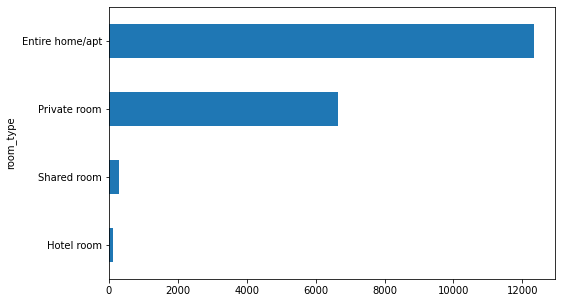

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(dfclean.groupby('room_type').size().sort_values(ascending=False))
dfclean.groupby('room_type').size().sort_values(ascending=True).plot(kind='barh', figsize=(8, 5));

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print((dfclean.groupby('room_type').size() / df.shape[0]).sort_values(ascending=False))

room_type
Entire home/apt    0.597906
Private room       0.321636
Shared room        0.014880
Hotel room         0.005283
dtype: float64


### **Q7. Qual a localidade mais cara do dataset?**
Na média, as três localidades mais caras para se hospedar em Sydney são:

1. **Pittwater**: 308/noite
2. **Manly**:     255/noite
3. **Mosman**:    251/noite

O que fiz aqui foi utilizar novamente o método `groupby` para categorizar a coluna `neighbourhood` de acordo com a média de preços da coluna `price`. Em seguida, plotei um gráfico de _scatter plot_ com os pontos em faixas de preço de acordo com a coordenadas geográficas de `latitude` e `longitude`.


In [16]:
# ver preços por bairros, na média
dfclean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Pittwater           308.009208
Manly               255.087937
Mosman              251.578199
Warringah           232.273212
Sutherland Shire    206.344928
Woollahra           202.440000
Waverley            199.474178
Leichhardt          193.751073
Hornsby             188.925234
North Sydney        186.224209
Hunters Hill        185.515152
Sydney              170.886540
Penrith             164.913669
Randwick            160.794931
Ku-Ring-Gai         157.394089
Lane Cove           156.890411
Willoughby          155.427152
The Hills Shire     153.926471
Auburn              150.629371
Canada Bay          148.036885
Campbelltown        141.736842
Liverpool           139.347368
Holroyd             136.090909
Marrickville        125.253994
Camden              123.304348
Ashfield            122.061111
Hurstville          121.588710
Ryde                119.198370
Botany Bay          113.306849
Strathfield         113.000000
Burwood             112.818653
Parramatta          111.2

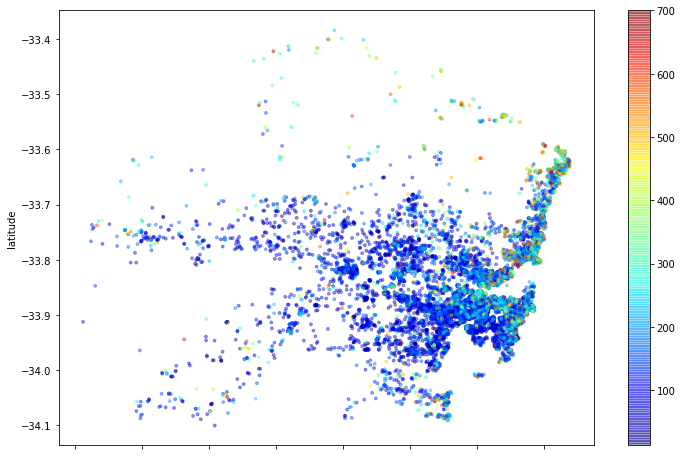

In [17]:
# plotar os imóveis pela latitude-longitude
dfclean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=dfclean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Aplicando o método describe para a coluna `minimum_nights`, vemos que a média está em cerca de 60 noites. Apesar de o valor máximo ser 1125, a representatividade dos outliers, acima de cerca de 240 noites, é de menos de 1% das entradas.



count    19388.000000
mean        59.693677
std         52.511049
min          1.000000
25%          3.000000
50%         90.000000
75%         90.000000
max       1125.000000
Name: minimum_nights, dtype: float64

minimum_nightes: valores acima de 240
69 entradas
0.3559%


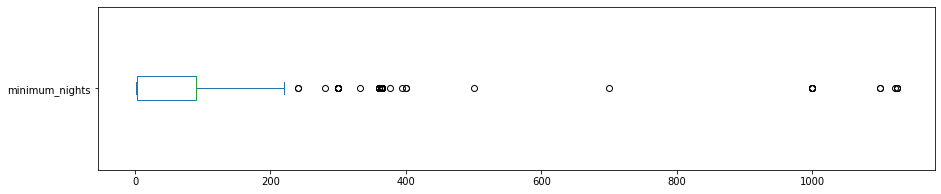

In [18]:
# ver a média da coluna `minimum_nights``

print(dfclean.minimum_nights.describe())

# valores de minimum_nightes superiores a 240 (um ano)

print('\nminimum_nightes: valores acima de 240')
print('{} entradas'.format(len(dfclean[dfclean.minimum_nights > 240])))
print('{:.4f}%'.format(len(dfclean[dfclean.minimum_nights > 240])/ dfclean.shape[0]*100))

# plotando o boxplot de minimum_nights

dfclean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

## Conclusões


A base de dados utilizada é apenas um resumo básico menos detalhado das informações sobre locação na cidade de Sydney. Existem outros data sets com maior volume de dados e variáveis para serem trabalhados numa próxima abordagem.
 
Foram identificadas algumas colunas com dados vazios mas que não influenciaram na nossa análise até aqui, tais como a `license` e `neighbourhood_group`. Esta última foi subtraída para melhorar a análise do conjunto de dados.

Foram identificados _outliers_ nas colunas `price` e `minimum_nights`. Na primeira, lidamos somente com os valores abaixo de 700, que representam 95% de todas as entradas, o que gerou uma média de 255 por pernoite. A média de preços por pernoite em Sydney ficou em 255. Na segunda, `minimum_nights`, os outliers com valores acima de 240 noites (o equivalente a cerca de 8 meses de aluguel), representam apenas 0,36% da base de dados. A média de pernoites mínimas na cidade em questão é de 59.

Cerca de 60% das pessoas alugam casa ou apartamentos inteiros e 32%, apenas quarto privativo.

A localidade mais cara, em média, para alugar um imóvel encontra-se em Pittwater, com a média do pernoite em 308, seguido por Manly (255) e Mosman (251).

